In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


2025-05-21 17:32:23.060536: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747848743.448849      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747848743.553963      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_dir = '/kaggle/input/dogcat/train'

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 20000 images belonging to 1 classes.
Found 5000 images belonging to 1 classes.


In [3]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


2025-05-21 17:33:18.012845: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [5]:
history = model.fit(
    train_generator,
    epochs=1,
    validation_data=val_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 643s 1s/step - accuracy: 0.9965 - loss: 0.0075 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [6]:
test_dir = '/kaggle/input/dogcat'

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode=None,
    shuffle=False,
    classes=['test1']  # This tells Keras to look into 'test1' folder
)

# Predict
predictions = model.predict(test_generator)


Found 12500 images belonging to 1 classes.
391/391 ━━━━━━━━━━━━━━━━━━━━ 104s 266ms/step


In [7]:
# Predictions are probabilities (between 0 and 1)
# Let's map them to class labels
predicted_classes = ['dog' if p > 0.5 else 'cat' for p in predictions.flatten()]

# Get filenames
filenames = test_generator.filenames
results = list(zip(filenames, predicted_classes))

# Display some predictions
for i in range(10):
    print(results[i])


('test1/test1/1.jpg', 'cat')
('test1/test1/10.jpg', 'cat')
('test1/test1/100.jpg', 'cat')
('test1/test1/1000.jpg', 'cat')
('test1/test1/10000.jpg', 'cat')
('test1/test1/10001.jpg', 'cat')
('test1/test1/10002.jpg', 'cat')
('test1/test1/10003.jpg', 'cat')
('test1/test1/10004.jpg', 'cat')
('test1/test1/10005.jpg', 'cat')


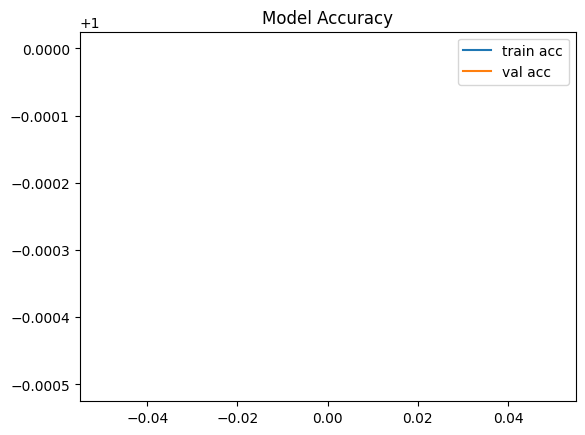

In [8]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.legend()
plt.show()


In [9]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


In [10]:
def predict_image(img_path, model):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0  # normalize
    img_array = np.expand_dims(img_array, axis=0)  # add batch dimension

    prediction = model.predict(img_array)[0][0]

    label = 'Dog' if prediction > 0.5 else 'Cat'
    
    # Show image
    plt.imshow(img)
    plt.title(f"Prediction: {label} ({prediction:.2f})")
    plt.axis('off')
    plt.show()
    
    return label


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


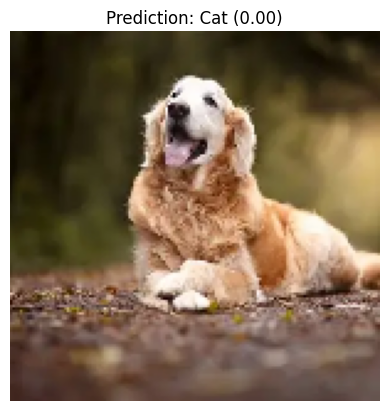

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


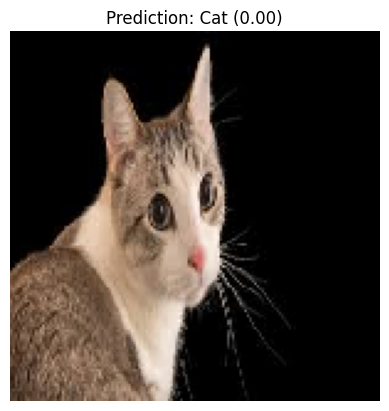

'Cat'

In [11]:
# Image 1
predict_image('/kaggle/input/testing-data/download.webp', model)

# Image 2
predict_image('/kaggle/input/testing-data/caat.jpeg', model)
